# Análisis Exploratorio

## Lectura de datos

Comenzaremos importando todas las librerías necesarias para realizar el análisis exploratorio.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

A continuación, leemos los datos 

In [2]:
data = pd.read_excel("data/datos.xlsx" )

In [29]:
data.head()

,ID,age,weight,height,BMI,R-RI,R-PI,R-PSV,L-RI,L-PI,...,meanPI,meanPSV,bilateralNotch,age_delivery,parity,birth_weight,S-Flt1,S-PLGF,sFLT/PLGF,class
0,2 DM,37,58.0,1.70,20.069204,0.43,0.56,65.3,0.49,0.60,...,0.580,59.6,0,37.285714,1,3060,11511,102.8,111.974708,Control
1,650387,35,46.0,1.64,17.102915,0.40,0.54,62.5,0.67,0.73,...,0.635,67.7,0,36.714286,3,2780,3146,752.8,4.179065,Control
2,650394,34,64.0,1.75,20.897959,0.41,0.60,59.7,0.53,0.62,...,0.610,61.0,0,35.142857,1,2450,3858,203.2,18.986220,Control
3,678474,31,49.0,1.52,21.208449,0.65,0.97,61.5,0.59,0.99,...,0.980,64.8,0,36.428571,2,2490,995,1051.0,0.946717,Control
4,653633,31,66.0,1.60,25.781250,0.62,0.88,58.1,0.59,0.76,...,0.820,58.6,0,32.142857,1,1905,1667,1440.0,1.157639,Control


Vamos a eliminar la columna de **ID** ya que se trata solo de un número utilizado para identificar a cada paciente 

In [30]:
data.drop('ID', axis=1, inplace=True)

In [31]:
data.columns=["age", "weight", "height", "BMI", "R-RI", "R-PI", "R-PSV", "L-RI", "L-PI", "L-PSV", "meanRI", "meanPI", "meanPSV", "bilateralNotch", "age_delivery", "parity", "birth_weight", "S-Flt1", "S-PLGF", "sFLT/PLGF", "class"] 

In [32]:
data.head(5)

,age,weight,height,BMI,R-RI,R-PI,R-PSV,L-RI,L-PI,L-PSV,...,meanPI,meanPSV,bilateralNotch,age_delivery,parity,birth_weight,S-Flt1,S-PLGF,sFLT/PLGF,class
0,37,58.0,1.70,20.069204,0.43,0.56,65.3,0.49,0.60,53.9,...,0.580,59.6,0,37.285714,1,3060,11511,102.8,111.974708,Control
1,35,46.0,1.64,17.102915,0.40,0.54,62.5,0.67,0.73,72.9,...,0.635,67.7,0,36.714286,3,2780,3146,752.8,4.179065,Control
2,34,64.0,1.75,20.897959,0.41,0.60,59.7,0.53,0.62,62.3,...,0.610,61.0,0,35.142857,1,2450,3858,203.2,18.986220,Control
3,31,49.0,1.52,21.208449,0.65,0.97,61.5,0.59,0.99,68.1,...,0.980,64.8,0,36.428571,2,2490,995,1051.0,0.946717,Control
4,31,66.0,1.60,25.781250,0.62,0.88,58.1,0.59,0.76,59.1,...,0.820,58.6,0,32.142857,1,1905,1667,1440.0,1.157639,Control


In [33]:
data.shape

(95, 21)

EL dataset está compuesto por 21 atributos (columnas) y 95 instancias (filas).

In [34]:
data.describe()

,age,weight,height,BMI,R-RI,R-PI,R-PSV,L-RI,L-PI,L-PSV,meanRI,meanPI,meanPSV,bilateralNotch,age_delivery,parity,S-Flt1,S-PLGF,sFLT/PLGF
count,95.000000,94.000000,94.000000,92.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.00000,93.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,32.147368,67.531915,1.655638,24.616912,0.639474,1.063158,60.809053,0.655895,1.102842,61.128000,0.647684,1.08300,61.022151,0.600000,33.871278,1.536842,13156.200000,302.825789,243.129174
std,5.084328,14.354724,0.062554,4.800613,0.126444,0.501891,6.709441,0.108437,0.470865,6.076082,0.112455,0.47324,5.705277,0.674773,4.417592,0.920344,13824.935398,383.390465,351.790952
min,21.000000,46.000000,1.500000,17.102915,0.400000,0.450000,47.800000,0.430000,0.520000,46.800000,0.420000,0.54000,50.200000,0.000000,22.000000,1.000000,995.000000,10.050000,0.946717
25%,29.000000,58.000000,1.620000,21.441041,0.560000,0.645000,56.700000,0.590000,0.695000,57.800000,0.570000,0.67000,57.600000,0.000000,31.000000,1.000000,3623.500000,54.020000,7.367625
50%,32.000000,65.000000,1.660000,23.529412,0.670000,0.870000,59.100000,0.670000,0.890000,60.200000,0.670000,0.93500,60.200000,0.000000,34.142857,1.000000,9530.000000,105.900000,119.728305
75%,36.000000,74.000000,1.700000,26.241408,0.735000,1.485000,63.250000,0.755000,1.530000,64.100000,0.750000,1.46750,62.450000,1.000000,37.428571,2.000000,17947.000000,448.550000,362.884861
max,47.000000,113.000000,1.800000,39.682540,0.840000,2.490000,89.800000,0.830000,2.280000,89.800000,0.835000,2.21500,88.650000,2.000000,41.142857,6.000000,74283.000000,1607.000000,2297.421203


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 21 columns):
age               95 non-null int64
weight            94 non-null float64
height            94 non-null float64
BMI               92 non-null float64
R-RI              95 non-null float64
R-PI              95 non-null float64
R-PSV             95 non-null float64
L-RI              95 non-null float64
L-PI              95 non-null float64
L-PSV             95 non-null float64
meanRI            95 non-null float64
meanPI            95 non-null float64
meanPSV           93 non-null float64
bilateralNotch    95 non-null int64
age_delivery      95 non-null float64
parity            95 non-null int64
birth_weight      95 non-null object
S-Flt1            95 non-null int64
S-PLGF            95 non-null float64
sFLT/PLGF         95 non-null float64
class             95 non-null object
dtypes: float64(15), int64(4), object(2)
memory usage: 15.7+ KB


## Valores ausentes

Comprobamos si existen filas duplicadas.

In [36]:
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 21)


No existen filas duplicadas. Ahora comprobamos el número de valores nulos por cada columna.

In [37]:
data.isnull().sum()

age               0
weight            1
height            1
BMI               3
R-RI              0
R-PI              0
R-PSV             0
L-RI              0
L-PI              0
L-PSV             0
meanRI            0
meanPI            0
meanPSV           2
bilateralNotch    0
age_delivery      0
parity            0
birth_weight      0
S-Flt1            0
S-PLGF            0
sFLT/PLGF         0
class             0
dtype: int64

Existen valores nulos en las columnas **weight, height, BMI** y **meanPSV**. Veámos las filas que contienen valores nulos.

In [38]:
nulos = data[data.isnull().any(1)]

In [39]:
nulos

,age,weight,height,BMI,R-RI,R-PI,R-PSV,L-RI,L-PI,L-PSV,...,meanPI,meanPSV,bilateralNotch,age_delivery,parity,birth_weight,S-Flt1,S-PLGF,sFLT/PLGF,class
58,43,66.0,1.52,NaN,0.63,0.60,67.4,0.59,0.67,62.9,...,0.635,65.15,0,32.714286,1,1480,27390,153.60,178.320312,IUGR_PE
59,36,52.0,1.64,NaN,0.67,0.81,57.9,0.69,0.89,61.4,...,0.850,59.65,1,34.714286,1,1280,29805,79.73,373.824157,IUGR_PE
61,26,NaN,NaN,NaN,0.84,2.02,68.8,0.83,2.28,59.4,...,2.150,64.10,1,28.000000,1,MFIU,10015,42.64,234.873358,IUGR
93,30,53.0,1.57,21.501886,0.49,0.52,60.4,0.51,0.56,58.1,...,0.540,NaN,0,34.142857,1,1570,10535,34.97,301.258221,PE
94,26,74.0,1.65,27.180900,0.69,0.62,54.9,0.73,0.71,60.5,...,0.665,NaN,2,30.428571,1,1180,12154,15.84,767.297980,PE


Vemos que en las filas 58 y 59 falta el valor de la columna **BMI**. El **BMI** indica el índice masa corporal, que se calcula dividiendo el peso entre la altura al cuadrado. Estos dos valores ausentes serán calculados usando las columnas **weight y height**.  
En la columna 61, falta tanto el **BMI** como **weight** y **height**. Para las columnas **weight** y **height**, calcularemos el valor medio de cada columna y lo sustituiremos por el valor nulo. En cuanto el valor ausente del **BMI**, haremos como en el primer caso y lo sustituiremos por el valor de **weight** dividido entre el valor de **height** al cuadrado correspondiente.  
Por último, en la fila 93 y 94 tienen ausente el valor de **meanPSV**. El valor de esta columna corresponde con el valor medio de las columnas **R-PSV** y **L-PSV**. Calcularemos este valor medio para sustituir al valor NaN.

## Clase

En este apartado, vamos a estudiar la clase del dataset.

In [40]:
data["class"].unique()

array(['Control', 'IUGR_PE', 'IUGR', 'PE'], dtype=object)

In [46]:
data["class"].value_counts()

IUGR_PE    32
Control    29
PE         22
IUGR       12
Name: class, dtype: int64

La clase puede tener cuatro valores distintos: *Control, IUGR_PE, IUGR y PE*. Por lo tanto, nos encontramos frente a un problema de clasificación multiclase. 

| Variable | Descripción |Número de pacientes|
| :- | :- | :- |
| IUGR_PE | Preeclampsia y restricción intrauterina del incremento | 32 |
| Control| No padece ninguna de las dos enfermedades | 29 |
| PE    | Preeclampsia | 22 |
| IUGR    | Restricción intrauterina del incremento | 12 |

Visualicemos cómo sería la distribución de la clase.

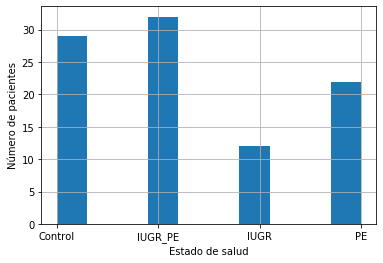

In [45]:
data["class"].hist()
plt.xlabel("Estado de salud")
plt.ylabel("Número de pacientes")
plt.show()

Vemos que la clase se encuentra un poco desbalanceada (para el valor IUGR tenemos muy pocos ejemplos).

## Tipo de variables

Vamos a estudiar qué tipos de variables tenemos en el dataset. Comenzaremos por las variables categóricas.

In [47]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
cat_vars

['birth_weight', 'class']